In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from cor_funcoes import * 

In [ ]:
pip install transformers torch scikit-learn pandas


In [38]:
file_path = './PEDE_PASSOS_DATASET_FIAP.csv'
pd.set_option('display.max_columns', None)
df = pd.read_csv(file_path, delimiter=';')

In [36]:
cleaning_dataset(df)

,NOME,PEDRA_2020,PEDRA_2021,PEDRA_2022,ALTO_AVALIACAO_2020,ENGAJAMENTO_2020,PISICOSSOCIAL_2020,APRENDIZAGEM_2020,ALTO_AVALIACAO_2021,ENGAJAMENTO_2021,PISICOSSOCIAL_2021,APRENDIZAGEM_2021,ALTO_AVALIACAO_2022,ENGAJAMENTO_2022,PISICOSSOCIAL_2022,APRENDIZAGEM_2022
0,ALUNO-1,Ametista,Ametista,NaN,8.50,8.7,7.50,7.0,7.5,6.3,6.9,8.8,NaN,NaN,NaN,NaN
2,ALUNO-3,Ametista,Ametista,NaN,7.92,8.9,7.50,5.5,7.1,6.9,6.3,5.6,NaN,NaN,NaN,NaN
3,ALUNO-4,Quartzo,NaN,Ametista,8.00,4.1,6.88,0.0,NaN,NaN,NaN,NaN,10.00,8.07,7.50,5.08
18,ALUNO-19,NaN,Ágata,Ametista,NaN,NaN,NaN,NaN,9.0,6.3,7.5,4.6,10.00,9.05,7.50,7.47
27,ALUNO-28,Topázio,Topázio,NaN,9.58,9.6,6.88,9.0,8.3,9.2,7.5,8.8,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,ALUNO-1315,Quartzo,Quartzo,NaN,8.00,6.9,5.00,4.5,8.9,3.8,4.4,4.3,NaN,NaN,NaN,NaN
1329,ALUNO-1330,NaN,Ametista,Quartzo,NaN,NaN,NaN,NaN,8.8,8.3,7.5,5.5,8.33,6.84,6.25,3.78
1333,ALUNO-1334,NaN,Topázio,Topázio,NaN,NaN,NaN,NaN,8.5,10.0,7.5,7.4,9.50,10.00,7.50,9.33
1334,ALUNO-1335,NaN,Quartzo,Ágata,NaN,NaN,NaN,NaN,0.0,3.8,7.5,3.4,9.00,7.67,5.62,6.17


In [4]:
print(df.count())

INSTITUICAO_ENSINO_ALUNO_2020     728
NOME                             1349
IDADE_ALUNO_2020                  728
ANOS_PM_2020                      728
FASE_TURMA_2020                   728
                                 ... 
INDICADO_BOLSA_2022               862
PONTO_VIRADA_2022                 862
IPV_2022                          862
IAN_2022                          862
NIVEL_IDEAL_2022                  862
Length: 69, dtype: int64


In [5]:
print(df.columns)

Index(['INSTITUICAO_ENSINO_ALUNO_2020', 'NOME', 'IDADE_ALUNO_2020',
       'ANOS_PM_2020', 'FASE_TURMA_2020', 'PONTO_VIRADA_2020', 'INDE_2020',
       'INDE_CONCEITO_2020', 'PEDRA_2020', 'DESTAQUE_IEG_2020',
       'DESTAQUE_IDA_2020', 'DESTAQUE_IPV_2020', 'IAA_2020', 'IEG_2020',
       'IPS_2020', 'IDA_2020', 'IPP_2020', 'IPV_2020', 'IAN_2020', 'FASE_2021',
       'TURMA_2021', 'INSTITUICAO_ENSINO_ALUNO_2021',
       'SINALIZADOR_INGRESSANTE_2021', 'PEDRA_2021', 'INDE_2021', 'IAA_2021',
       'IEG_2021', 'IPS_2021', 'IDA_2021', 'IPP_2021', 'REC_EQUIPE_1_2021',
       'REC_EQUIPE_2_2021', 'REC_EQUIPE_3_2021', 'REC_EQUIPE_4_2021',
       'PONTO_VIRADA_2021', 'IPV_2021', 'IAN_2021', 'NIVEL_IDEAL_2021',
       'DEFASAGEM_2021', 'FASE_2022', 'TURMA_2022', 'ANO_INGRESSO_2022',
       'BOLSISTA_2022', 'INDE_2022', 'CG_2022', 'CF_2022', 'CT_2022',
       'PEDRA_2022', 'DESTAQUE_IEG_2022', 'DESTAQUE_IDA_2022',
       'DESTAQUE_IPV_2022', 'IAA_2022', 'IEG_2022', 'IPS_2022', 'IDA_2022',
       

In [6]:
# Identificar duplicados na coluna 'NOME'
duplicados = df['NOME'].duplicated()

# Verificar se há duplicados (True/False)
print(duplicados.any())

False


In [7]:
#colunas acrescentadas
filters = ['2020', '2021', '2022']
filtered_dataframes = filter_columns_multiple(df, filters)


df_2020_mais = filtered_dataframes['2020']
df_2021_mais = filtered_dataframes['2021']
df_2022_mais = filtered_dataframes['2022']

In [8]:
colunas_2020 = set(df_2020_mais.columns)
colunas_2021 = set(df_2021_mais.columns)
colunas_2022 = set(df_2022_mais.columns)

print(f'2020: {colunas_2020}')
print(f'2021: {colunas_2021}')
print(f'2022: {colunas_2022}')

2020: {'FASE_TURMA_2020', 'IDADE_ALUNO_2020', 'IAA_2020', 'IPS_2020', 'DESTAQUE_IEG_2020', 'PEDRA_2020', 'IDA_2020', 'IEG_2020', 'IPV_2020', 'IAN_2020', 'DESTAQUE_IDA_2020', 'INDE_CONCEITO_2020', 'INDE_2020', 'DESTAQUE_IPV_2020', 'IPP_2020', 'ANOS_PM_2020', 'INSTITUICAO_ENSINO_ALUNO_2020', 'PONTO_VIRADA_2020'}
2021: {'REC_EQUIPE_1_2021', 'TURMA_2021', 'IEG_2021', 'INSTITUICAO_ENSINO_ALUNO_2021', 'REC_EQUIPE_2_2021', 'IAA_2021', 'INDE_2021', 'REC_EQUIPE_3_2021', 'DEFASAGEM_2021', 'NIVEL_IDEAL_2021', 'PONTO_VIRADA_2021', 'IDA_2021', 'PEDRA_2021', 'FASE_2021', 'IPV_2021', 'IPS_2021', 'IAN_2021', 'SINALIZADOR_INGRESSANTE_2021', 'REC_EQUIPE_4_2021', 'IPP_2021'}
2022: {'FASE_2022', 'ANO_INGRESSO_2022', 'REC_AVA_4_2022', 'IPS_2022', 'IPV_2022', 'BOLSISTA_2022', 'IPP_2022', 'CT_2022', 'IDA_2022', 'NOTA_PORT_2022', 'DESTAQUE_IPV_2022', 'INDE_2022', 'IAA_2022', 'IAN_2022', 'PEDRA_2022', 'PONTO_VIRADA_2022', 'IEG_2022', 'REC_AVA_2_2022', 'NOTA_ING_2022', 'TURMA_2022', 'QTD_AVAL_2022', 'REC_AVA_3_

In [9]:
# Filtrando as colunas por ano
colunas_2020 = [col for col in df.columns if col.endswith('2020')]
colunas_2021 = [col for col in df.columns if col.endswith('2021')]
colunas_2022 = [col for col in df.columns if col.endswith('2022')]

# Criando os DataFrames para cada ano
df_2020 = df[['NOME'] + colunas_2020]
df_2021 = df[['NOME'] + colunas_2021]
df_2022 = df[['NOME'] + colunas_2022]

In [10]:
df_2020.head(2)

,NOME,INSTITUICAO_ENSINO_ALUNO_2020,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,DESTAQUE_IDA_2020,DESTAQUE_IPV_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020
0,ALUNO-1,Escola Pública,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.500020000000001,8.7,7.5,7,5.9375,7.75,10
1,ALUNO-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_2021.head(2)

,NOME,FASE_2021,TURMA_2021,INSTITUICAO_ENSINO_ALUNO_2021,SINALIZADOR_INGRESSANTE_2021,PEDRA_2021,INDE_2021,IAA_2021,IEG_2021,IPS_2021,IDA_2021,IPP_2021,REC_EQUIPE_1_2021,REC_EQUIPE_2_2021,REC_EQUIPE_3_2021,REC_EQUIPE_4_2021,PONTO_VIRADA_2021,IPV_2021,IAN_2021,NIVEL_IDEAL_2021,DEFASAGEM_2021
0,ALUNO-1,2.0,G,Rede Decisão,Ingressante,Ametista,7.319,7.5,6.3,6.9,8.8,7.7,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,8.1,5.0,Nível 3 (7o e 8o ano),-1.0
1,ALUNO-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_2022.head(2)

,NOME,FASE_2022,TURMA_2022,ANO_INGRESSO_2022,BOLSISTA_2022,INDE_2022,CG_2022,CF_2022,CT_2022,PEDRA_2022,DESTAQUE_IEG_2022,DESTAQUE_IDA_2022,DESTAQUE_IPV_2022,IAA_2022,IEG_2022,IPS_2022,IDA_2022,NOTA_PORT_2022,NOTA_MAT_2022,NOTA_ING_2022,QTD_AVAL_2022,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
0,ALUNO-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ALUNO-2,0.0,K,2022.0,Não,7.675509,245.0,66.0,6.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Destaque: A sua boa integração aos Princípios ...,10.00002,7.581705,7.5,8.816667,8.2,9.433333,NaN,2.0,5.625,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano)


*Análise de alunos (*de forma individual? 🤔*) ao longo dos anos (*Ex: temos dados do 'ALUNO 1' em 2020 e 2021, já em 2022 não temos dados... Seria talvez desistência?*)

In [13]:
num_nomes_distintos = len(df['NOME'].unique())
print(f"Número de nomes distintos: {num_nomes_distintos}")

Número de nomes distintos: 1349


In [14]:
# Filtra os alunos de cada turma, excluindo os NaN
turma_2020 = set(df[df['PEDRA_2020'].notna()]['NOME'])
turma_2021 = set(df[df['PEDRA_2021'].notna()]['NOME'])
turma_2022 = set(df[df['PEDRA_2022'].notna()]['NOME'])

# Calcula os alunos exclusivos para cada turma
somente_2020 = list(turma_2020 - turma_2021 - turma_2022)  # Alunos apenas em 2020
somente_2021 = list(turma_2021 - turma_2020 - turma_2022)  # Alunos apenas em 2021
somente_2022 = list(turma_2022 - turma_2020 - turma_2021)  # Alunos apenas em 2022

# Alunos presentes nos três anos
alunos_3_anos = list(turma_2020.intersection(turma_2021, turma_2022))

# Todos os alunos listados em pelo menos um dos anos
todos_alunos = turma_2020.union(turma_2021, turma_2022)

# Alunos que ficaram fora das listas exclusivas e da lista de três anos
alunos_fora_das_listas = list(todos_alunos - set(somente_2020) - set(somente_2021) - set(somente_2022) - set(alunos_3_anos))


In [15]:
# Contando o número de elementos em cada lista
qnt_2020 = len(somente_2020)
qnt_2021 = len(somente_2021)
qnt_2022 = len(somente_2022)
qnt_3_anos = len(alunos_3_anos)
qnt_nao_inclusos = len(alunos_fora_das_listas)

# Exibindo os resultados
print("qnt_2020:")
print(qnt_2020)
print("\nqnt_2021:")
print(qnt_2021)
print("\nqnt_2022:")
print(qnt_2022)
print("\nqnt_3_anos:")
print(qnt_3_anos)
print("\nqnt_nao_inclusos nas listas:")
print(qnt_nao_inclusos)
print("\nQuantos nos três anos (2020, 2021, 2022):")
print(qnt_2020 + qnt_2021 + qnt_2022 + qnt_3_anos + qnt_nao_inclusos)



qnt_2020:
258

qnt_2021:
86

qnt_2022:
392

qnt_3_anos:
314

qnt_nao_inclusos nas listas:
299

Quantos nos três anos (2020, 2021, 2022):
1349


* Alunos não inclusos nas listas são alunos que cursaram parte de 2021 e 2022

In [16]:
# Criando DataFrames a partir das listas
df_somente_2020 = df[df['NOME'].isin(somente_2020)][['NOME', 'PEDRA_2020','IAA_2020','IEG_2020','IPS_2020','IDA_2020' ]]
df_somente_2021 = df[df['NOME'].isin(somente_2021)][['NOME', 'PEDRA_2021', 'IAA_2021','IEG_2021','IPS_2021','IDA_2021']]
df_somente_2022 = df[df['NOME'].isin(somente_2022)][['NOME', 'PEDRA_2022', 'IAA_2022','IEG_2022','IPS_2022','IDA_2022']]
df_alunos_3_anos = df[df['NOME'].isin(alunos_3_anos)][['NOME', 'PEDRA_2020' , 'PEDRA_2021' ,'PEDRA_2022', 'IAA_2020','IEG_2020','IPS_2020','IDA_2020','IAA_2021','IEG_2021','IPS_2021','IDA_2021', 'IAA_2022','IEG_2022','IPS_2022','IDA_2022']]
df_alunos_fora_das_listas = df[df['NOME'].isin(alunos_fora_das_listas)][['NOME', 'PEDRA_2020','PEDRA_2021', 'PEDRA_2022',  'IAA_2020','IEG_2020','IPS_2020','IDA_2020','IAA_2021','IEG_2021','IPS_2021','IDA_2021', 'IAA_2022','IEG_2022','IPS_2022','IDA_2022']]

* Tratamento dos dados

In [17]:
df_somente_2020.head()

,NOME,PEDRA_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020
9,ALUNO-10,Quartzo,5.83333,5.2,3.75,0
11,ALUNO-12,Quartzo,6.25,6,5.625,6.666666666666667
13,ALUNO-14,Ágata,8.000020000000001,7.6,6.875,0
14,ALUNO-15,Quartzo,8.500020000000001,4,7.5,0
32,ALUNO-33,Ágata,6.66667,4.5,7.5,8.666666666666666


In [18]:
df_alunos_3_anos.head()

,NOME,PEDRA_2020,PEDRA_2021,PEDRA_2022,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IAA_2021,IEG_2021,IPS_2021,IDA_2021,IAA_2022,IEG_2022,IPS_2022,IDA_2022
4,ALUNO-5,Ametista,Ametista,Ametista,7.50002,8,7.5,7.5,7.4,7.5,7.5,5.4,6.41668,8.557505,7.500,7.083333
7,ALUNO-8,Ametista,Topázio,Ametista,8.33334,9.9,4.375,7.333333333333333,8.8,8.6,7.5,7.1,9.16668,8.268065,5.000,7.144444
10,ALUNO-11,Topázio,Topázio,Topázio,9.000020000000001,10,8.125,10,9.0,10.0,6.3,8.8,8.00002,9.198413,7.500,9.833333
16,ALUNO-17,Ametista,Ágata,Ágata,9.500020000000001,6.8,7.5,10,9.5,4.2,7.5,2.6,9.50002,6.647870,7.500,5.500000
17,ALUNO-18,Ágata,Ágata,Quartzo,9.58335,7,7.5,6.5,10.0,3.3,6.3,5.3,0.00000,6.287640,8.125,5.222222


In [19]:
print(df_alunos_3_anos.dtypes)

NOME           object
PEDRA_2020     object
PEDRA_2021     object
PEDRA_2022     object
IAA_2020       object
IEG_2020       object
IPS_2020       object
IDA_2020       object
IAA_2021      float64
IEG_2021      float64
IPS_2021      float64
IDA_2021      float64
IAA_2022      float64
IEG_2022      float64
IPS_2022      float64
IDA_2022      float64
dtype: object


* Algumas colunas numericas estão com tipo errado e o numero de casas decimasi está despadronazado

In [20]:
# Lista das colunas a serem convertidas
colunas_para_converter = ['IAA_2020','IEG_2020','IPS_2020','IDA_2020','IAA_2021','IEG_2021','IPS_2021','IDA_2021', 'IAA_2022','IEG_2022','IPS_2022','IDA_2022']

df_alunos_3_anos = converter_e_arredondar(df_alunos_3_anos, colunas_para_converter, casas_decimais=2)


df_alunos_3_anos.head()  


Colunas ['IAA_2020', 'IEG_2020', 'IPS_2020', 'IDA_2020', 'IAA_2021', 'IEG_2021', 'IPS_2021', 'IDA_2021', 'IAA_2022', 'IEG_2022', 'IPS_2022', 'IDA_2022'] foram convertidas para float e arredondadas para 2 casas decimais.


,NOME,PEDRA_2020,PEDRA_2021,PEDRA_2022,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IAA_2021,IEG_2021,IPS_2021,IDA_2021,IAA_2022,IEG_2022,IPS_2022,IDA_2022
4,ALUNO-5,Ametista,Ametista,Ametista,7.50,8.0,7.50,7.50,7.4,7.5,7.5,5.4,6.42,8.56,7.50,7.08
7,ALUNO-8,Ametista,Topázio,Ametista,8.33,9.9,4.38,7.33,8.8,8.6,7.5,7.1,9.17,8.27,5.00,7.14
10,ALUNO-11,Topázio,Topázio,Topázio,9.00,10.0,8.12,10.00,9.0,10.0,6.3,8.8,8.00,9.20,7.50,9.83
16,ALUNO-17,Ametista,Ágata,Ágata,9.50,6.8,7.50,10.00,9.5,4.2,7.5,2.6,9.50,6.65,7.50,5.50
17,ALUNO-18,Ágata,Ágata,Quartzo,9.58,7.0,7.50,6.50,10.0,3.3,6.3,5.3,0.00,6.29,8.12,5.22


In [21]:
df_somente_2020 = converter_e_arredondar(df_somente_2020, colunas_para_converter, casas_decimais=2)
df_somente_2021 = converter_e_arredondar(df_somente_2021, colunas_para_converter, casas_decimais=2)
df_somente_2022 = converter_e_arredondar(df_somente_2022, colunas_para_converter, casas_decimais=2)

df_alunos_fora_das_listas = converter_e_arredondar(df_alunos_fora_das_listas, colunas_para_converter, casas_decimais=2)

df_somente_2020.head()

Colunas ['IAA_2020', 'IEG_2020', 'IPS_2020', 'IDA_2020', 'IAA_2021', 'IEG_2021', 'IPS_2021', 'IDA_2021', 'IAA_2022', 'IEG_2022', 'IPS_2022', 'IDA_2022'] foram convertidas para float e arredondadas para 2 casas decimais.
Colunas ['IAA_2020', 'IEG_2020', 'IPS_2020', 'IDA_2020', 'IAA_2021', 'IEG_2021', 'IPS_2021', 'IDA_2021', 'IAA_2022', 'IEG_2022', 'IPS_2022', 'IDA_2022'] foram convertidas para float e arredondadas para 2 casas decimais.
Colunas ['IAA_2020', 'IEG_2020', 'IPS_2020', 'IDA_2020', 'IAA_2021', 'IEG_2021', 'IPS_2021', 'IDA_2021', 'IAA_2022', 'IEG_2022', 'IPS_2022', 'IDA_2022'] foram convertidas para float e arredondadas para 2 casas decimais.
Colunas ['IAA_2020', 'IEG_2020', 'IPS_2020', 'IDA_2020', 'IAA_2021', 'IEG_2021', 'IPS_2021', 'IDA_2021', 'IAA_2022', 'IEG_2022', 'IPS_2022', 'IDA_2022'] foram convertidas para float e arredondadas para 2 casas decimais.


,NOME,PEDRA_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020
9,ALUNO-10,Quartzo,5.83,5.2,3.75,0.00
11,ALUNO-12,Quartzo,6.25,6.0,5.62,6.67
13,ALUNO-14,Ágata,8.00,7.6,6.88,0.00
14,ALUNO-15,Quartzo,8.50,4.0,7.50,0.00
32,ALUNO-33,Ágata,6.67,4.5,7.50,8.67


* Analise exploratoria dos dados
 - df_somente_2020
 - df_somente_2021
 - df_somente_2022
 - df_alunos_3_anos
 - df_alunos_fora_das_listas

In [22]:
lista_dfs = [
'df_somente_2020',
'df_somente_2021',
'df_somente_2022',
'df_alunos_3_anos'
,'df_alunos_fora_das_listas']

In [23]:
for nome_df in lista_dfs:
    df = globals()[nome_df] 

    if nome_df.startswith('df_somente_'): 
        ano = nome_df.split('_')[-1]  
        colunas_renomeadas = {
            f'IAA_{ano}': f'ALTO_AVALIACAO_{ano}',
            f'IEG_{ano}': f'ENGAJAMENTO_{ano}',
            f'IPS_{ano}': f'PISICOSSOCIAL_{ano}',
            f'IDA_{ano}': f'APRENDIZAGEM_{ano}'
        }
        df = df.rename(columns=colunas_renomeadas)  

    elif nome_df in ['df_alunos_3_anos', 'df_alunos_fora_das_listas']:  
        colunas_renomeadas = {
            'IAA_2020': 'ALTO_AVALIACAO_2020',
            'IEG_2020': 'ENGAJAMENTO_2020',
            'IPS_2020': 'PISICOSSOCIAL_2020',
            'IDA_2020': 'APRENDIZAGEM_2020',
            'IAA_2021': 'ALTO_AVALIACAO_2021',
            'IEG_2021': 'ENGAJAMENTO_2021',
            'IPS_2021': 'PISICOSSOCIAL_2021',
            'IDA_2021': 'APRENDIZAGEM_2021',
            'IAA_2022': 'ALTO_AVALIACAO_2022',
            'IEG_2022': 'ENGAJAMENTO_2022',
            'IPS_2022': 'PISICOSSOCIAL_2022',
            'IDA_2022': 'APRENDIZAGEM_2022'
        }
        df = df.rename(columns=colunas_renomeadas)  

    globals()[nome_df] = df  



In [24]:
desc_2020 = df_somente_2020.describe().round(2)
desc_2020 

,ALTO_AVALIACAO_2020,ENGAJAMENTO_2020,PISICOSSOCIAL_2020,APRENDIZAGEM_2020
count,257.00,257.00,257.00,257.00
mean,7.93,6.60,6.70,5.24
std,2.27,2.89,1.31,3.29
min,0.00,0.00,2.50,0.00
25%,7.50,4.80,6.25,2.67
50%,8.50,7.30,7.50,6.00
75%,9.17,9.00,7.50,7.67
max,10.00,10.00,10.00,10.00


In [25]:
desc_2021 = df_somente_2021.describe().round(2)
desc_2021

,ALTO_AVALIACAO_2021,ENGAJAMENTO_2021,PISICOSSOCIAL_2021,APRENDIZAGEM_2021
count,86.00,86.00,86.00,86.00
mean,8.12,6.44,6.72,4.93
std,2.19,2.48,1.95,2.24
min,0.00,0.00,0.00,0.00
25%,7.90,5.00,7.50,3.42
50%,8.50,6.70,7.50,5.55
75%,9.00,8.30,7.50,6.57
max,10.00,10.00,8.80,8.90


In [26]:
desc_2022 = df_somente_2022.describe().round(2)

desc_2022

,ALTO_AVALIACAO_2022,ENGAJAMENTO_2022,PISICOSSOCIAL_2022,APRENDIZAGEM_2022
count,392.00,392.00,392.00,392.00
mean,8.46,8.03,7.08,6.08
std,1.91,1.53,0.92,2.14
min,0.00,2.90,4.38,0.00
25%,8.00,7.26,6.88,4.75
50%,9.00,8.44,7.50,6.33
75%,9.50,9.17,7.50,7.75
max,10.00,10.00,10.00,9.73


In [27]:
df_alunos_3_anos.columns

Index(['NOME', 'PEDRA_2020', 'PEDRA_2021', 'PEDRA_2022', 'ALTO_AVALIACAO_2020',
       'ENGAJAMENTO_2020', 'PISICOSSOCIAL_2020', 'APRENDIZAGEM_2020',
       'ALTO_AVALIACAO_2021', 'ENGAJAMENTO_2021', 'PISICOSSOCIAL_2021',
       'APRENDIZAGEM_2021', 'ALTO_AVALIACAO_2022', 'ENGAJAMENTO_2022',
       'PISICOSSOCIAL_2022', 'APRENDIZAGEM_2022'],
      dtype='object')

# Análise de Dados - Avaliações de 2020 a 2022

A partir das métricas fornecidas para os anos de 2020, 2021 e 2022, podemos observar as tendências e variações nos indicadores de **ALTO_AVALIACAO**, **ENGAJAMENTO**, **PISICOSSOCIAL** e **APRENDIZAGEM**.

## 2020:

### **ALTO_AVALIACAO_2020**:
- **Média**: 7.93
- **Desvio padrão**: 2.27
- **Mínimo**: 0
- **Máximo**: 10
- **Mediana**: 8.50
  - A maioria dos participantes atribuiu uma avaliação positiva (próxima do máximo).
  - A variação foi considerável, com alguns participantes dando a nota mínima.

### **ENGAJAMENTO_2020**:
- **Média**: 6.60
- **Desvio padrão**: 2.89
- **Mínimo**: 0
- **Máximo**: 10
- **Mediana**: 7.30
  - A maioria dos participantes teve um engajamento moderado a alto, mas ainda houve uma dispersão considerável entre as avaliações.

### **PISICOSSOCIAL_2020**:
- **Média**: 6.70
- **Desvio padrão**: 1.31
- **Mínimo**: 2.50
- **Máximo**: 10
- **Mediana**: 7.50
  - A percepção sobre o bem-estar psicossocial foi positiva para a maioria, mas com alguma variação nas respostas.

### **APRENDIZAGEM_2020**:
- **Média**: 5.24
- **Desvio padrão**: 3.29
- **Mínimo**: 0
- **Máximo**: 10
- **Mediana**: 6.00
  - As avaliações sobre aprendizagem foram mais dispersas, com uma parte significativa dos participantes atribuindo notas baixas.

## 2021:

### **ALTO_AVALIACAO_2021**:
- **Média**: 8.12
- **Desvio padrão**: 2.19
- **Mínimo**: 0
- **Máximo**: 10
- **Mediana**: 8.50
  - A avaliação subiu ligeiramente em comparação com 2020, com uma distribuição semelhante, mas as notas foram um pouco mais altas.

### **ENGAJAMENTO_2021**:
- **Média**: 6.44
- **Desvio padrão**: 2.48
- **Mínimo**: 0
- **Máximo**: 10
- **Mediana**: 6.70
  - Houve uma leve queda no engajamento em relação a 2020, mas a dispersão entre as respostas permaneceu alta.

### **PISICOSSOCIAL_2021**:
- **Média**: 6.72
- **Desvio padrão**: 1.95
- **Mínimo**: 0
- **Máximo**: 8.80
- **Mediana**: 7.50
  - A percepção sobre o bem-estar psicossocial permaneceu positiva, mas com uma variação maior em relação ao ano anterior.

### **APRENDIZAGEM_2021**:
- **Média**: 4.93
- **Desvio padrão**: 2.24
- **Mínimo**: 0
- **Máximo**: 8.90
- **Mediana**: 5.55
  - As avaliações sobre aprendizagem foram mais negativas, com uma média mais baixa em comparação a 2020.

## 2022:

### **ALTO_AVALIACAO_2022**:
- **Média**: 8.46
- **Desvio padrão**: 1.91
- **Mínimo**: 0
- **Máximo**: 10
- **Mediana**: 9.00
  - A avaliação aumentou ainda mais em 2022, com a maioria atribuindo notas muito altas e uma menor variação nas respostas.

### **ENGAJAMENTO_2022**:
- **Média**: 8.03
- **Desvio padrão**: 1.53
- **Mínimo**: 2.90
- **Máximo**: 10
- **Mediana**: 8.44
  - O engajamento subiu consideravelmente, com um valor mínimo mais alto e maior concentração de respostas no topo da escala.

### **PISICOSSOCIAL_2022**:
- **Média**: 7.08
- **Desvio padrão**: 0.92
- **Mínimo**: 4.38
- **Máximo**: 10
- **Mediana**: 7.50
  - O bem-estar psicossocial foi percebido de maneira muito positiva, com uma menor variação entre as respostas, refletindo maior consistência.

### **APRENDIZAGEM_2022**:
- **Média**: 6.08
- **Desvio padrão**: 2.14
- **Mínimo**: 0
- **Máximo**: 9.73
- **Mediana**: 6.33
  - A percepção de aprendizagem melhorou em relação a 2021, mas ainda se manteve em níveis medianos.

## Conclusão:

Em termos gerais, houve uma **tendência de melhoria nas avaliações** ao longo dos anos:
- **2020**: As avaliações começaram com uma média mais baixa, principalmente na percepção de **APRENDIZAGEM**.
- **2021**: Apesar de uma leve melhora, **ENGAJAMENTO** e **APRENDIZAGEM** mostraram uma queda, refletindo uma percepção mista.
- **2022**: As avaliações atingiram os **níveis mais altos**, com destaque para o **ALTO_AVALIACAO** e o **ENGAJAMENTO**, que alcançaram as médias mais elevadas, além de uma percepção consistente sobre o **PISICOSSOCIAL**.

A partir dessa análise, podemos concluir que os participantes se sentiram progressivamente mais satisfeitos e engajados ao longo dos anos, enquanto a percepção de **APRENDIZAGEM** continuou moderada, mas com um leve crescimento. O maior índice de satisfação foi registrado em 2022, refletindo um possível impacto positivo de intervenções ou melhorias no ambiente.


In [28]:
desc_3_anos = df_alunos_3_anos.describe().round(2)
desc_3_anos

,ALTO_AVALIACAO_2020,ENGAJAMENTO_2020,PISICOSSOCIAL_2020,APRENDIZAGEM_2020,ALTO_AVALIACAO_2021,ENGAJAMENTO_2021,PISICOSSOCIAL_2021,APRENDIZAGEM_2021,ALTO_AVALIACAO_2022,ENGAJAMENTO_2022,PISICOSSOCIAL_2022,APRENDIZAGEM_2022
count,314.00,314.00,314.00,314.00,314.00,314.00,314.00,314.00,314.00,314.00,314.00,314.00
mean,8.71,8.50,6.77,7.24,8.20,7.03,6.81,5.73,8.10,7.73,6.64,5.95
std,1.16,1.57,1.47,2.43,2.19,2.39,1.26,2.16,2.15,1.78,1.21,2.00
min,0.00,0.80,2.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.75,0.72
25%,8.33,8.00,5.62,6.00,7.90,5.80,6.30,4.60,7.92,6.68,5.62,4.59
50%,9.00,8.90,7.50,7.67,8.80,7.50,7.50,6.25,8.50,8.24,7.50,6.16
75%,9.50,9.70,7.50,9.00,9.50,8.80,7.50,7.30,9.17,9.07,7.50,7.46
max,10.00,10.00,10.00,10.00,10.00,10.00,8.80,9.50,10.00,10.00,9.38,9.92


# Análise de Dados - Avaliações de Alunos que Permaneceram Três Anos em Sequência (2020-2022)

A análise dos dados para os alunos que permaneceram durante os três anos consecutivos (2020, 2021 e 2022) revela um desempenho geral elevado, com algumas variações nas métricas ao longo dos anos. A seguir, apresentamos as métricas para as variáveis **ALTO_AVALIACAO**, **ENGAJAMENTO**, **PISICOSSOCIAL** e **APRENDIZAGEM**.

## Métricas 2020-2022 para Alunos que Permaneceram Três Anos

### **ALTO_AVALIACAO**:
- **Média**: 8.71 (2020), 8.20 (2021), 8.10 (2022)
  - A média para **ALTO_AVALIACAO** foi alta ao longo dos três anos, com um pequeno declínio em 2021 e 2022. Mesmo assim, o valor continuou elevado, com a maioria dos alunos atribuindo notas entre 8 e 10.
- **Desvio padrão**: 1.16 (2020), 2.19 (2021), 2.15 (2022)
  - O desvio padrão aumentou ao longo dos anos, refletindo maior dispersão nas avaliações à medida que o tempo avançava.
- **Máximo**: 10 (todos os anos)
  - O valor máximo foi consistentemente 10 em todos os anos, indicando a presença de alunos com a avaliação máxima.

### **ENGAJAMENTO**:
- **Média**: 8.50 (2020), 7.03 (2021), 7.73 (2022)
  - **ENGAJAMENTO** teve um pico em 2020, com uma média superior a 8, mas observou uma queda considerável em 2021. Em 2022, o engajamento mostrou um leve aumento, mas não retornou ao nível de 2020.
- **Desvio padrão**: 1.57 (2020), 2.39 (2021), 1.78 (2022)
  - O desvio padrão foi mais baixo em 2020 e 2022, mas aumentou em 2021, refletindo maior variabilidade nas respostas, especialmente no segundo ano.
- **Máximo**: 10 (todos os anos)
  - Assim como para **ALTO_AVALIACAO**, o máximo também foi 10 em todos os anos.

### **PISICOSSOCIAL**:
- **Média**: 6.77 (2020), 6.81 (2021), 6.64 (2022)
  - O **PISICOSSOCIAL** manteve-se relativamente estável ao longo dos anos, com uma leve variação em 2022. A média foi constante ao redor de 6.7, sugerindo que os alunos tinham uma percepção moderada de seu bem-estar psicossocial durante o período.
- **Desvio padrão**: 1.47 (2020), 1.26 (2021), 1.21 (2022)
  - O desvio padrão diminuiu ao longo dos anos, indicando uma percepção mais homogênea do bem-estar psicossocial entre os alunos nos anos seguintes.
- **Máximo**: 10 (2020), 8.80 (2021), 9.38 (2022)
  - O valor máximo foi 10 em 2020, mas teve uma leve redução em 2021, voltando a subir um pouco em 2022.

### **APRENDIZAGEM**:
- **Média**: 7.24 (2020), 5.73 (2021), 5.95 (2022)
  - A percepção sobre **APRENDIZAGEM** apresentou uma tendência de queda, com uma média bastante alta em 2020, mas uma redução significativa nos dois anos seguintes. Isso indica que, embora muitos alunos tenham uma boa percepção de aprendizado no primeiro ano, essa percepção diminuiu ao longo do tempo.
- **Desvio padrão**: 2.43 (2020), 2.16 (2021), 2.00 (2022)
  - A variabilidade nas percepções de **APRENDIZAGEM** foi alta nos três anos, mas apresentou uma leve queda nos últimos dois anos, indicando uma maior uniformidade nas percepções ao longo do tempo.
- **Máximo**: 10 (2020), 9.50 (2021), 9.92 (2022)
  - O valor máximo foi mais alto em 2022, indicando que, embora a média tenha caído, alguns alunos ainda atribuíram avaliações muito altas.

## Conclusão:

A análise das métricas para os alunos que permaneceram nos três anos consecutivos revela tendências interessantes:
- **ALTO_AVALIACAO** manteve-se bastante constante, com uma ligeira queda nos últimos dois anos, o que sugere que os alunos estavam consistentemente satisfeitos com sua avaliação.
- O **ENGAJAMENTO** apresentou uma queda significativa em 2021, mas se recuperou parcialmente em 2022.
- O **PISICOSSOCIAL** permaneceu estável, com uma leve queda ao longo dos anos, indicando uma percepção constante do bem-estar.
- A percepção de **APRENDIZAGEM** apresentou uma queda ao longo dos anos, o que pode ser um ponto de atenção, refletindo uma possível necessidade de melhorias na abordagem pedagógica ou no ambiente de aprendizado.

Em geral, os alunos que permaneceram ao longo de 2020 a 2022 mostraram um desempenho elevado, mas algumas áreas, como o engajamento e a percepção de aprendizagem, merecem atenção para garantir a manutenção ou o aumento da satisfação geral.


In [29]:
desc_fora_das_listas = df_alunos_fora_das_listas.describe().round(2)
desc_fora_das_listas

,ALTO_AVALIACAO_2020,ENGAJAMENTO_2020,PISICOSSOCIAL_2020,APRENDIZAGEM_2020,ALTO_AVALIACAO_2021,ENGAJAMENTO_2021,PISICOSSOCIAL_2021,APRENDIZAGEM_2021,ALTO_AVALIACAO_2022,ENGAJAMENTO_2022,PISICOSSOCIAL_2022,APRENDIZAGEM_2022
count,156.00,156.00,156.00,156.00,286.00,286.00,286.00,286.00,156.00,156.00,156.00,156.00
mean,8.40,7.81,6.74,6.26,8.11,6.71,6.91,5.24,8.11,7.82,6.98,6.29
std,1.48,2.13,1.29,2.75,2.20,2.51,1.49,2.05,2.32,1.64,1.02,1.96
min,0.00,0.90,3.12,0.00,0.00,0.00,0.00,0.00,0.00,3.15,2.50,0.44
25%,8.00,6.80,5.62,4.50,7.90,5.00,7.50,3.90,7.92,6.78,6.25,5.04
50%,8.50,8.45,7.50,6.58,8.50,6.80,7.50,5.60,8.75,8.20,7.50,6.73
75%,9.17,9.40,7.50,8.50,9.20,8.80,7.50,6.88,9.50,9.06,7.50,7.59
max,10.00,10.00,10.00,10.00,10.00,10.00,8.80,9.00,10.00,10.00,10.00,9.62


# Análise de Dados - Avaliações de Alunos que Permaneceram Dois Anos (2020-2022)

A análise dos dados para os alunos que permaneceram durante dois anos consecutivos (2020 e 2021) e (2021 e 2022) revela algumas variações no desempenho das métricas ao longo do tempo. A seguir, apresentamos as métricas para as variáveis **ALTO_AVALIACAO**, **ENGAJAMENTO**, **PISICOSSOCIAL** e **APRENDIZAGEM**.

## Métricas 2020-2022 para Alunos que Permaneceram Dois Anos

### **ALTO_AVALIACAO**:
- **Média**: 8.40 (2020), 8.11 (2021), 8.11 (2022)
  - **ALTO_AVALIACAO** manteve-se alta ao longo dos dois anos, com uma leve queda em 2021 e 2022. Apesar disso, a média continuou consistente, com alunos atribuindo notas em sua maioria entre 8 e 10.
- **Desvio padrão**: 1.48 (2020), 2.20 (2021), 2.32 (2022)
  - O desvio padrão aumentou ao longo dos anos, o que pode indicar uma maior dispersão nas avaliações de **ALTO_AVALIACAO**.
- **Máximo**: 10 (todos os anos)
  - O valor máximo foi consistentemente 10 em todos os anos.

### **ENGAJAMENTO**:
- **Média**: 7.81 (2020), 6.71 (2021), 7.82 (2022)
  - **ENGAJAMENTO** teve uma ligeira queda em 2021, mas recuperou-se em 2022, retornando ao nível de 2020. A variação sugere um período de menor engajamento durante o segundo ano, seguido por uma recuperação no último ano.
- **Desvio padrão**: 2.13 (2020), 2.51 (2021), 1.64 (2022)
  - O desvio padrão aumentou em 2021, refletindo maior variabilidade nas respostas de engajamento nesse ano, e diminuiu em 2022, mostrando uma maior uniformidade.
- **Máximo**: 10 (todos os anos)
  - O valor máximo foi 10 em todos os anos, indicando que alguns alunos ainda apresentaram o engajamento máximo.

### **PISICOSSOCIAL**:
- **Média**: 6.74 (2020), 6.91 (2021), 6.98 (2022)
  - A média de **PISICOSSOCIAL** teve um leve aumento de 2020 para 2021 e 2022, indicando uma percepção positiva crescente do bem-estar psicossocial entre os alunos.
- **Desvio padrão**: 1.29 (2020), 1.49 (2021), 1.02 (2022)
  - O desvio padrão foi mais baixo em 2022, o que sugere uma maior consistência nas respostas dos alunos em relação ao bem-estar psicossocial.
- **Máximo**: 10 (2020), 8.80 (2021), 10 (2022)
  - O valor máximo foi 10 tanto em 2020 quanto em 2022, mostrando que, embora a média tenha sido moderada, houve alunos com avaliações extremamente positivas.

### **APRENDIZAGEM**:
- **Média**: 6.26 (2020), 5.24 (2021), 6.29 (2022)
  - A percepção sobre **APRENDIZAGEM** variou consideravelmente, com uma queda em 2021 e uma leve recuperação em 2022. Isso sugere que, apesar de um bom começo em 2020, houve desafios no segundo ano, seguidos de um pequeno aumento em 2022.
- **Desvio padrão**: 2.75 (2020), 2.05 (2021), 1.96 (2022)
  - O desvio padrão foi mais alto em 2020, indicando maior variabilidade nas percepções de aprendizado. O valor diminuiu nos dois anos seguintes, refletindo maior uniformidade na percepção dos alunos.
- **Máximo**: 10 (2020), 9.00 (2021), 9.62 (2022)
  - O valor máximo foi 10 em 2020, e subiu para 9.62 em 2022, sugerindo que alguns alunos continuaram a perceber um aprendizado de alto nível.

## Conclusão:

A análise das métricas para os alunos que permaneceram durante dois anos consecutivos revela os seguintes padrões:
- **ALTO_AVALIACAO** manteve-se estável ao longo dos dois anos, com uma leve queda, mas ainda mantendo-se em níveis elevados.
- **ENGAJAMENTO** teve uma queda em 2021, mas se recuperou em 2022, refletindo uma variação no nível de participação dos alunos ao longo dos anos.
- **PISICOSSOCIAL** mostrou um pequeno aumento, indicando uma percepção de bem-estar psicossocial crescente entre os alunos.
- **APRENDIZAGEM** teve uma queda em 2021, seguida de uma leve recuperação em 2022, o que sugere que os alunos enfrentaram dificuldades de aprendizado no segundo ano.

Apesar de algumas flutuações, o desempenho geral dos alunos que permaneceram dois anos consecutivos ainda é positivo, com destaque para a melhoria na percepção psicossocial ao longo do tempo e a recuperação do engajamento no último ano.


**Alunos que ficaram apenas 1 ano x que cursaram os 3 anos**

In [30]:
dfs_somente_anos = {
    2020: df_somente_2020,
    2021: df_somente_2021,
    2022: df_somente_2022
}

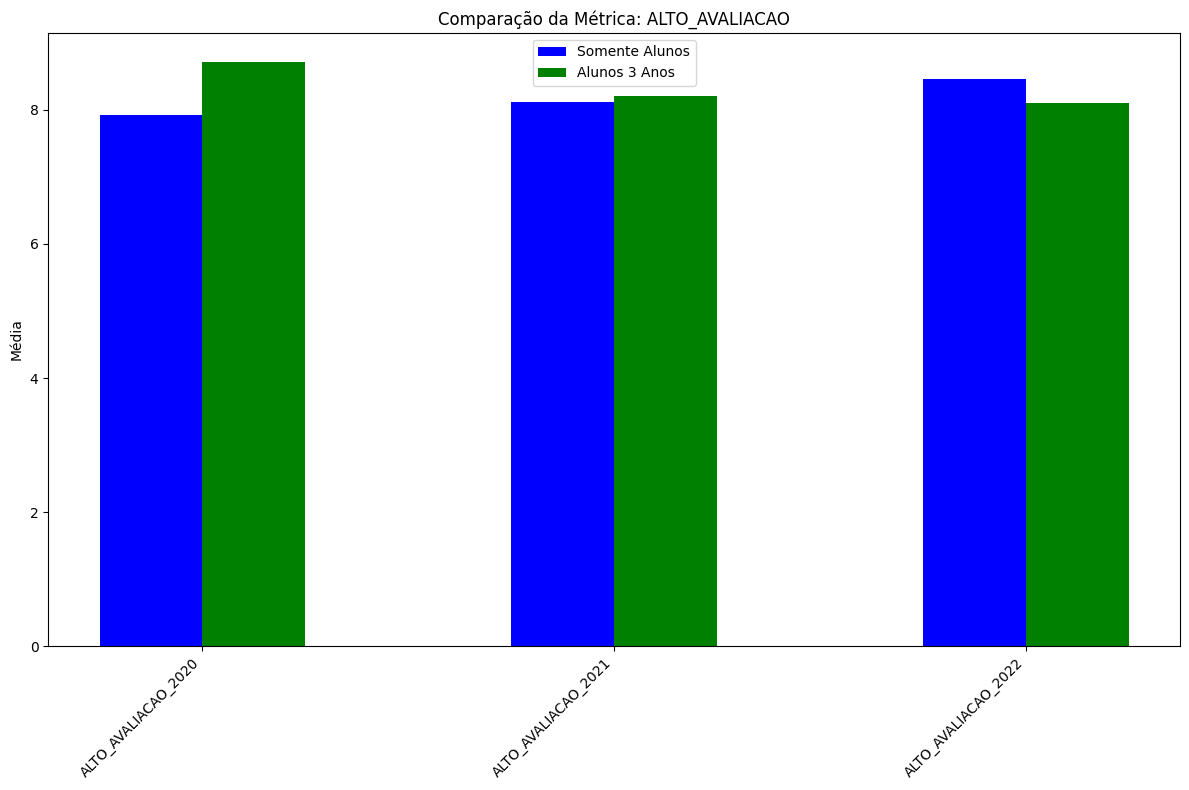

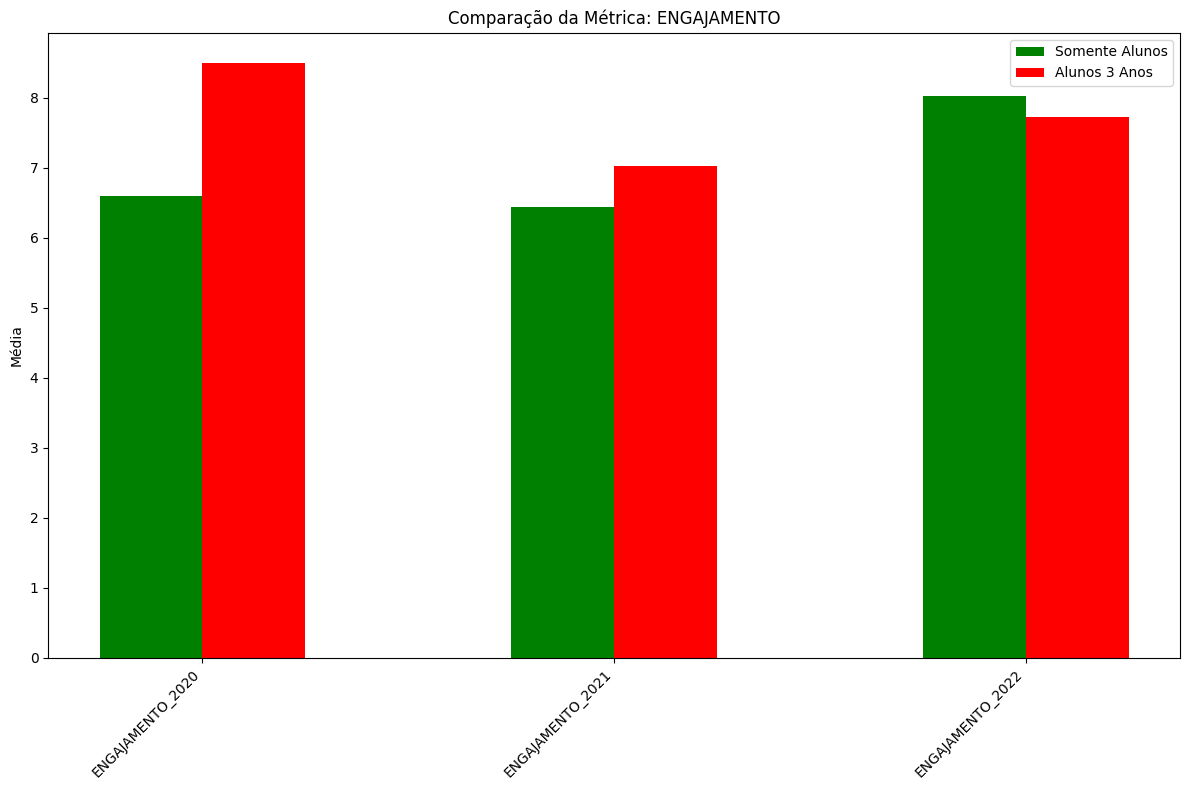

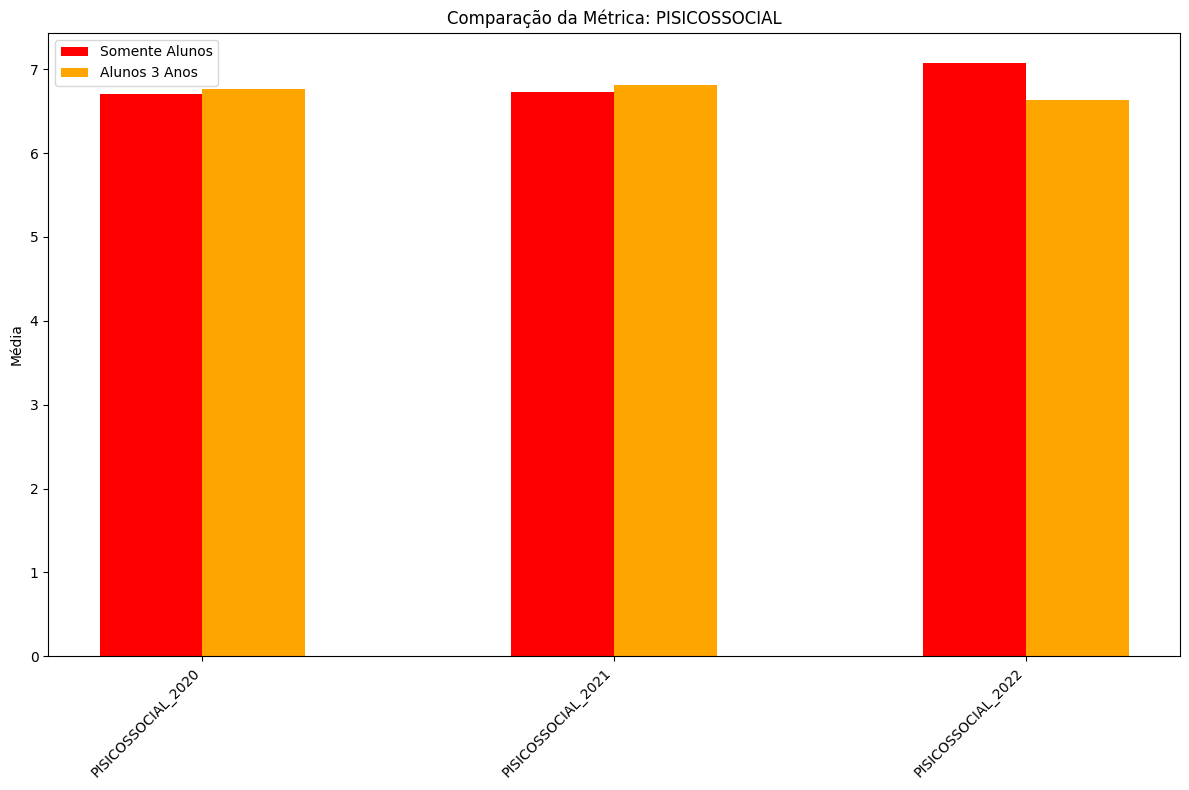

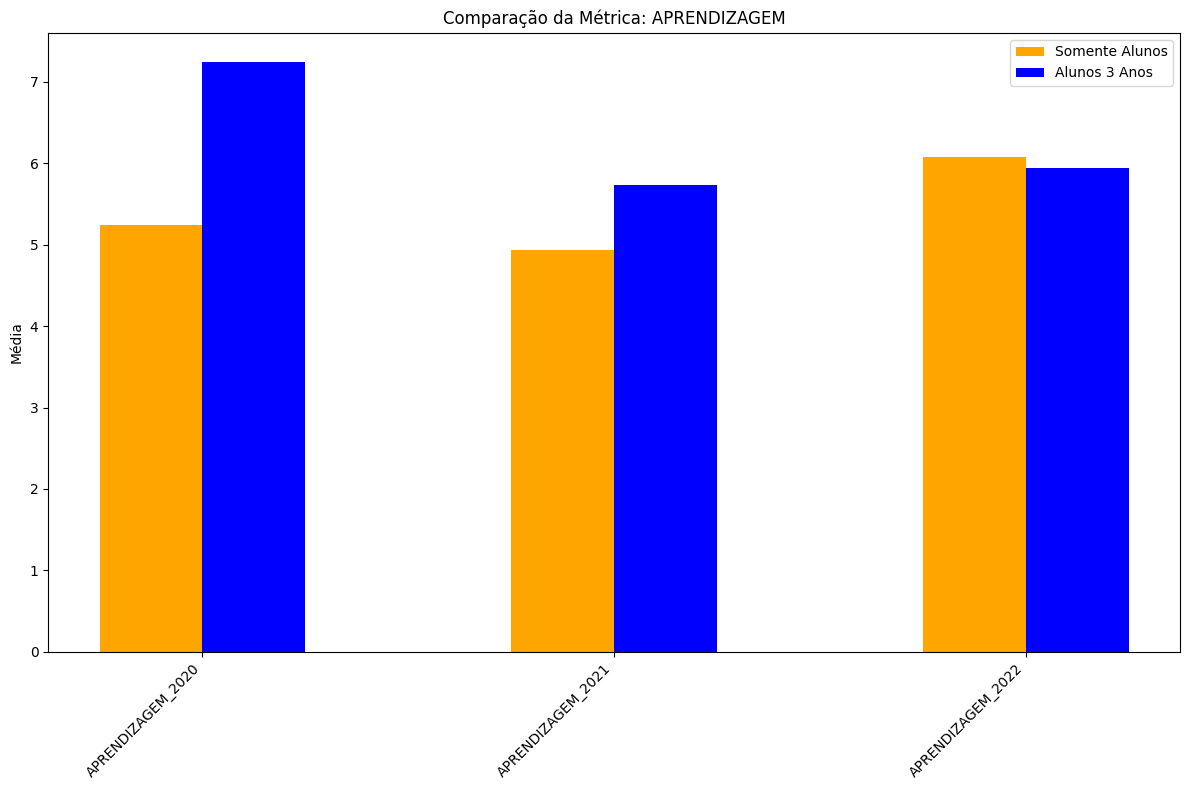

In [31]:
comparar_colunas_por_metrica(df_alunos_3_anos, dfs_somente_anos, [2020, 2021, 2022])



# Conclusão da Análise Comparativa de Gráficos de Barras (2020, 2021, 2022)

A análise dos gráficos de barras comparando métricas de alunos que cursaram os três anos consecutivos (2020, 2021 e 2022) com alunos que ficaram apenas em anos isolados revela importantes padrões de desempenho. A seguir, destacamos os principais insights:

## **Alto Avaliação**
- Em **2020**, os alunos que cursaram os três anos apresentaram **maiores níveis de alto avaliação** do que aqueles que participaram apenas em 2020.
- No comparativo de **2021**, as avaliações foram **bastante próximas** entre os grupos.
- Já em **2022**, os alunos que entraram exclusivamente neste último ano tiveram **maior alto avaliação** em relação aos demais.

## **Engajamento**
- Na métrica de **engajamento**, os alunos que cursaram os três anos consecutivos mantiveram **cerca de 15% a mais** de avaliação em 2020, destacando-se sobre os demais.
- Em **2021**, os alunos dos três anos continuaram com engajamento maior em relação aos que ficaram apenas no ano isolado.
- Em **2022**, a tendência se inverte, com os alunos que entraram exclusivamente no último ano obtendo as **maiores avaliações**, embora a diferença seja pequena.

## **Psicossocial**
- Para a métrica **psicossocial**, os dois primeiros anos (2020 e 2021) apresentaram **avaliações empatadas** entre os grupos.
- Em **2022**, os alunos que ingressaram exclusivamente no último ano obtiveram **avaliações psicossociais mais altas**, sugerindo maior percepção de bem-estar neste grupo.

## **Aprendizagem**
- Em **2020**, a avaliação de **aprendizagem** dos alunos que cursaram os três anos foi **20% maior** em comparação aos alunos que participaram somente no ano isolado.
- No ano de **2021**, a avaliação de aprendizagem continuou maior para os alunos dos três anos, mas a diferença foi reduzida.
- Já em **2022**, a avaliação ficou **quase empatada**, com uma **pequena vantagem** para os alunos que ingressaram exclusivamente no último ano.

## **Conclusão Geral**
Os alunos que cursaram os três anos consecutivos apresentaram, de forma geral, um desempenho mais consistente nas métricas avaliadas, com destaque para **alto avaliação**, **engajamento** e **aprendizagem** nos primeiros anos. Entretanto, em **2022**, observou-se uma inversão em algumas métricas, como **engajamento**, **psicossocial** e **aprendizagem**, com os alunos que ingressaram apenas neste último ano obtendo melhores avaliações em comparação aos demais.

Essa análise destaca a importância de compreender o impacto do tempo de permanência dos alunos na evolução das métricas e na percepção geral do desempenho ao longo dos anos.


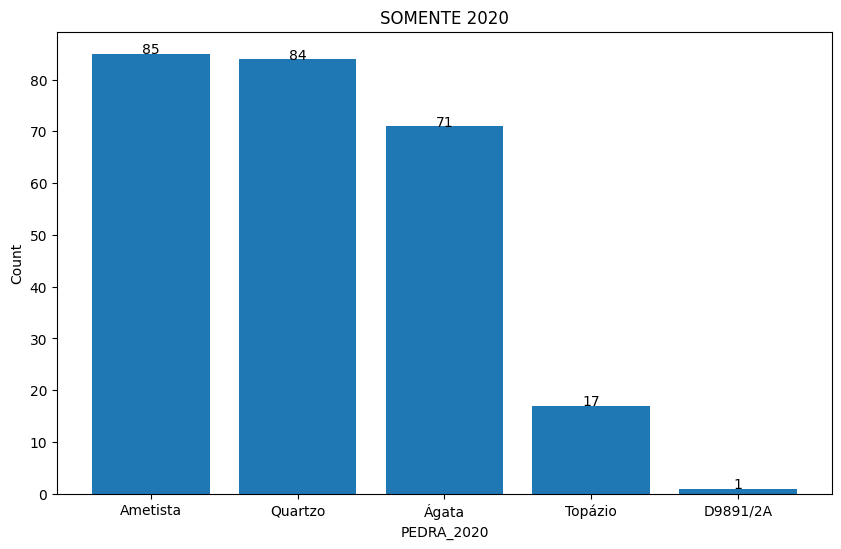

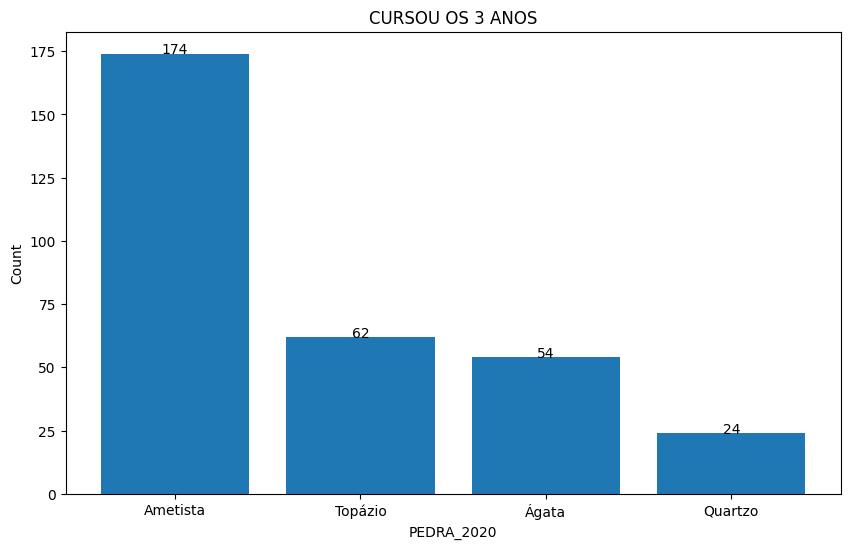

In [32]:
plot_exact_counter(size=(10, 6),text='SOMENTE 2020' ,x='PEDRA_2020', y=df_somente_2020['PEDRA_2020'].value_counts(), df=df_somente_2020)
plot_exact_counter(size=(10, 6),text='CURSOU OS 3 ANOS',x='PEDRA_2020', y=df_alunos_3_anos['PEDRA_2020'].value_counts(), df=df_alunos_3_anos)


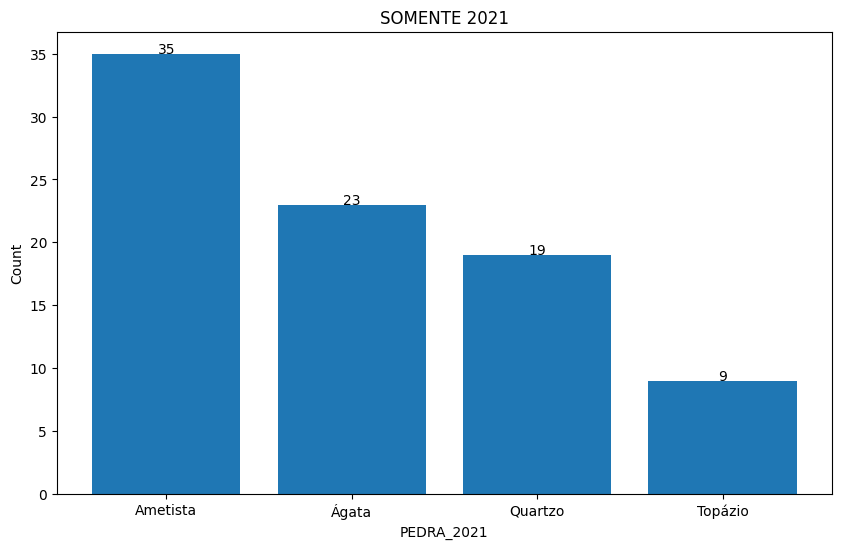

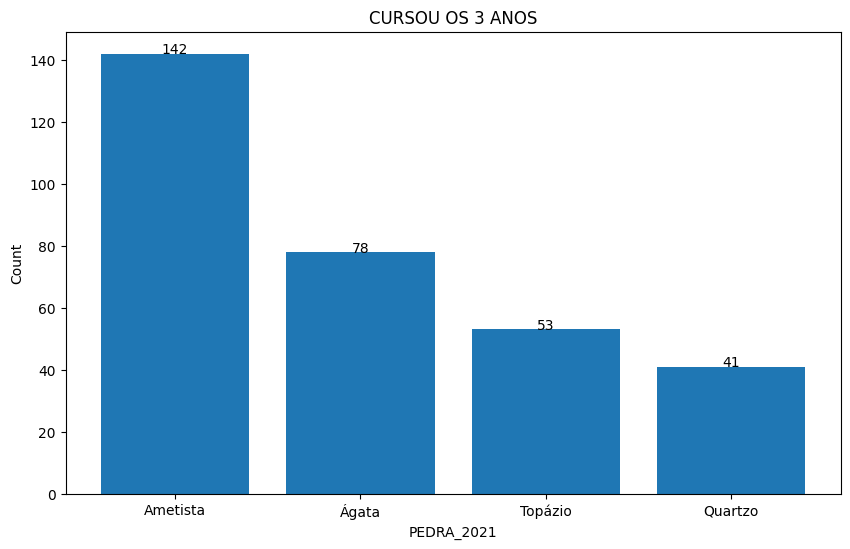

In [33]:
plot_exact_counter(size=(10, 6),text='SOMENTE 2021', x='PEDRA_2021', y=df_somente_2021['PEDRA_2021'].value_counts(), df=df_somente_2021)
plot_exact_counter(size=(10, 6),text='CURSOU OS 3 ANOS',x='PEDRA_2021', y=df_alunos_3_anos['PEDRA_2021'].value_counts(), df=df_alunos_3_anos)

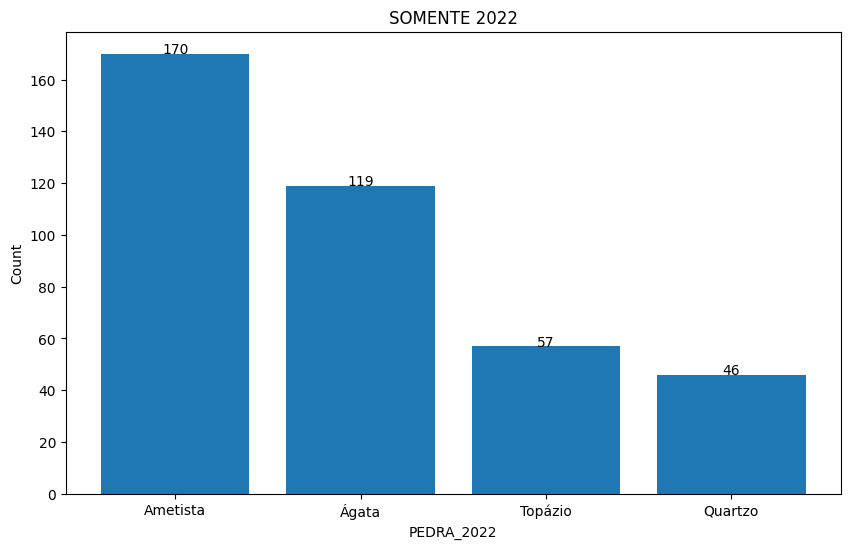

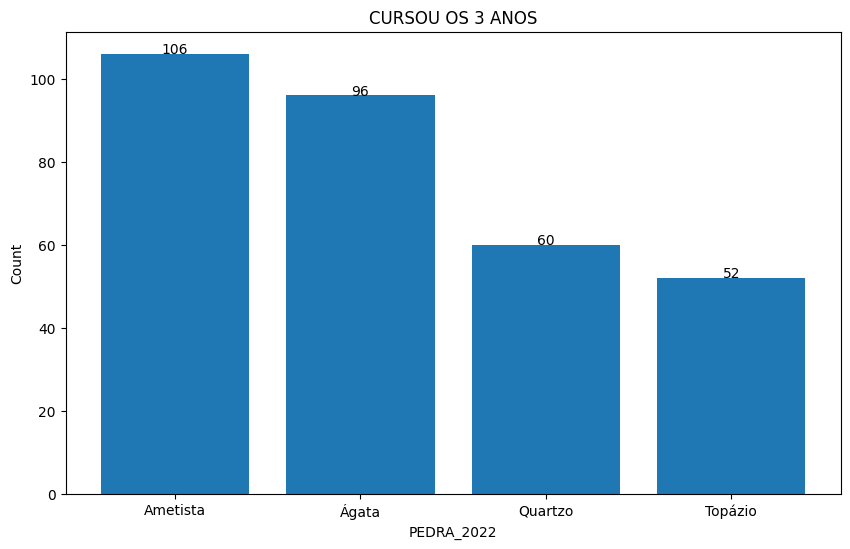

In [34]:
plot_exact_counter(size=(10, 6), text='SOMENTE 2022',x='PEDRA_2022', y=df_somente_2022['PEDRA_2022'].value_counts(), df=df_somente_2022)
plot_exact_counter(size=(10, 6),text='CURSOU OS 3 ANOS',x='PEDRA_2022', y=df_alunos_3_anos['PEDRA_2022'].value_counts(), df=df_alunos_3_anos)

# Classificação dos Alunos por Pedras

A classificação dos alunos em categorias baseadas nas pedras preciosas **Quartzo, Ágata, Ametista e Topázio** permitiu identificar padrões de desempenho ao longo dos anos de 2020, 2021 e 2022, comparando os alunos que cursaram os três anos consecutivos com aqueles que participaram apenas em um ano específico.

## **Principais Observações**

1. **Distribuição de Alunos por Pedra**
   - A maior parte dos alunos ao longo dos anos se concentra nas categorias **Ametista e Ágata**, sugerindo uma predominância desses níveis de desempenho.
   - A categoria **Topázio**, que representa a mais alta classificação, apresentou um número significativamente menor de alunos em comparação com as demais.

2. **Diferença entre Alunos de Três Anos e Alunos de um Ano**
   - Os alunos que cursaram os três anos consecutivos apresentaram **maior distribuição nas categorias superiores** (Ametista e Topázio) em relação aos alunos que participaram apenas de um ano isolado.
   - Em **2020**, os alunos que permaneceram nos três anos tiveram **mais do que o dobro** de estudantes na categoria Topázio (62) em comparação com os alunos que cursaram apenas 2020 (17).
   - Em **2021**, essa tendência se manteve, com um número significativamente maior de alunos de três anos classificados como **Topázio** (53) e **Ametista** (142) em relação aos alunos de apenas um ano.
   - Já em **2022**, a categoria **Ametista** foi a mais representativa para ambos os grupos, mas os alunos que ingressaram apenas neste ano tiveram um número maior nessa classificação (170) do que os alunos que permaneceram nos três anos (106).

3. **Tendências ao Longo dos Anos**
   - Observa-se que, para os alunos que permaneceram os três anos, há um equilíbrio maior entre as categorias, indicando um **desenvolvimento mais consistente** ao longo do tempo.
   - Em contrapartida, os alunos que ingressaram em um único ano tendem a se concentrar mais em algumas categorias específicas, sugerindo variações no desempenho de acordo com a composição das turmas.

## **Conclusão Final**
A análise mostra que os alunos que cursaram os três anos consecutivos tendem a apresentar **um desempenho mais distribuído entre os diferentes níveis** e uma presença maior nas categorias superiores, especialmente **Topázio** e **Ametista**. Isso indica que a continuidade no aprendizado pode ter um impacto positivo na evolução do desempenho ao longo do tempo.

Já os alunos que participaram de apenas um ano demonstram **variações significativas** em suas classificações, sugerindo que diferentes fatores podem influenciar seu desenvolvimento educacional.

Essas informações são fundamentais para a **avaliação do impacto da permanência estudantil** e podem contribuir para a formulação de estratégias pedagógicas que promovam uma melhor progressão dos alunos ao longo dos anos.


# Análise de Alunos ao Longo dos Anos

A análise dos dados dos alunos ao longo dos anos permitiu identificar padrões relacionados à continuidade ou interrupção de sua trajetória educacional. Abaixo estão os principais pontos relacionados à questão:

## **Alunos com Dados Faltantes**
- Alguns alunos possuem registros em **2020** e **2021**, mas estão ausentes em **2022**. Essa ausência pode indicar:
  - **Desistência**: O aluno pode ter abandonado o curso ou programa.
  - **Transferência**: O aluno pode ter migrado para outra instituição ou programa educacional.
  - **Conclusão**: O aluno pode ter concluído o ciclo de estudos.

## **Análise Individual por Categoria**
- Ao observar as classificações por pedras preciosas (Quartzo, Ágata, Ametista e Topázio), podemos identificar padrões de desempenho e sua relação com a continuidade:
  - **Alunos consistentes (2020-2022)**:
    - Esses alunos apresentaram **maior estabilidade e progressão nas categorias superiores**, especialmente Topázio e Ametista.
    - A continuidade parece estar associada a um **desempenho mais equilibrado e consistente** ao longo dos anos.
  - **Alunos ausentes em anos posteriores**:
    - Em grande parte, os alunos ausentes em **2022** tendem a se concentrar nas categorias inferiores, como **Quartzo** ou **Ágata**, sugerindo que dificuldades no desempenho podem ter contribuído para a interrupção.

## **Desempenho e Desistência**
- Foi possível observar que alunos que participaram de apenas um ano apresentaram maior concentração em **Ágata** e **Ametista**, com **poucos casos em Topázio**.
- Para os alunos ausentes nos anos seguintes, o padrão de desempenho sugere que:
  - **Desempenhos mais baixos** (Quartzo e Ágata) podem estar associados a desistências ou dificuldades no acompanhamento do programa.
  - **Desempenhos superiores** (Ametista e Topázio) entre alunos ausentes podem estar relacionados a outros fatores, como transferência ou conclusão.

## **Visualização Temporal**
Uma análise temporal foi realizada para identificar a presença ou ausência de alunos em cada ano, destacando sua evolução nas classificações:
- **Alunos presentes nos três anos**: Mostraram maior **progressão ou estabilidade** nas categorias superiores.
- **Alunos ausentes em anos intermediários**: Esses casos sugerem que, para alguns, a ausência pode ser temporária, enquanto outros não retornaram.

---

## **Conclusão**
A análise revelou que a ausência de dados de alguns alunos em anos posteriores pode ser interpretada como desistência, transferência ou conclusão do ciclo de estudos. Além disso, os alunos que cursaram os três anos consecutivos mostraram uma progressão mais consistente, enquanto os alunos que participaram de apenas um ano apresentaram maior variação em suas classificações.

Esses resultados reforçam a importância de investigar as razões por trás das desistências ou interrupções, permitindo o desenvolvimento de estratégias pedagógicas que incentivem a continuidade e o melhor desempenho dos alunos.
